In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [107]:
file_path = '/Users/leifgiardino/Desktop/astron_98_final_project/data/data.csv'
try:
    data = pd.read_csv(file_path, skiprows=17)
    data = data[['pl_orbsmax', 'pl_radj']]
    data.columns = ['Orbital_SemiMajorAxis', 'Planet_Radius']
    data = data.dropna(subset=['Orbital_SemiMajorAxis', 'Planet_Radius'])
    print(data)

except Exception as e:
    print(f"Error reading or processing the file: {e}")


      Orbital_SemiMajorAxis  Planet_Radius
0                  1.178000           1.09
1                  1.530000           1.09
2                  0.775000           1.16
3                  2.774000           1.12
4                  1.660000           1.20
...                     ...            ...
5783               0.059222           1.25
5784               0.827774           1.10
5785               2.513290           1.11
5786               1.180000           1.27
5787               0.625000           1.20

[5492 rows x 2 columns]


In [109]:
def power_law(x, a, b):
    return a * (x ** b)

In [111]:
x_data = data['Orbital_SemiMajorAxis'].values
y_data = data['Planet_Radius'].values

popt, pcov = curve_fit(power_law, x_data, y_data, p0=[1, 1])

a_fit, b_fit = popt

x_fit = np.linspace(min(x_data), max(x_data), 500)
y_fit = power_law(x_fit, a_fit, b_fit)


In [113]:
a_fit, b_fit = popt
a_err, b_err = np.sqrt(np.diag(pcov))
print(f"a = {a_fit:.4f} ± {a_err:.4f}")
print(f"b = {b_fit:.4f} ± {b_err:.4f}")

a = 0.6639 ± 0.0071
b = 0.1492 ± 0.0036


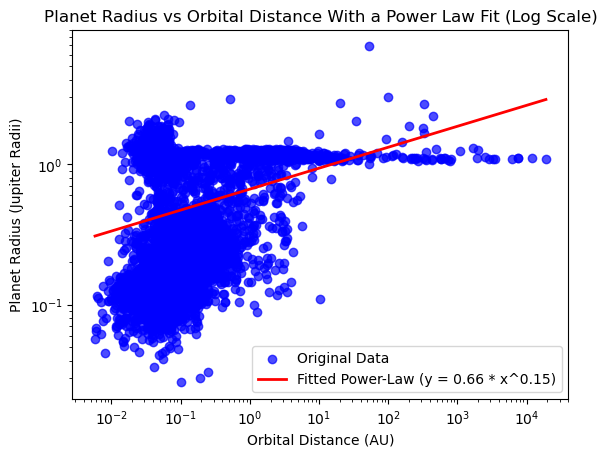

In [97]:
plt.figure()
plt.scatter(data['Orbital_SemiMajorAxis'], data['Planet_Radius'], label='Original Data', color='blue', alpha=0.7)
plt.plot(x_fit, y_fit, label=f"Fitted Power-Law (y = {a_fit:.2f} * x^{b_fit:.2f})", color='red', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Distance (AU)')
plt.ylabel('Planet Radius (Jupiter Radii)')
plt.legend()
plt.title('Planet Radius vs Orbital Distance With a Power Law Fit (Log Scale)')
plt.show()

In [93]:
y_pred = power_law(x_data, a_fit, b_fit)
residuals = y_data - y_pred

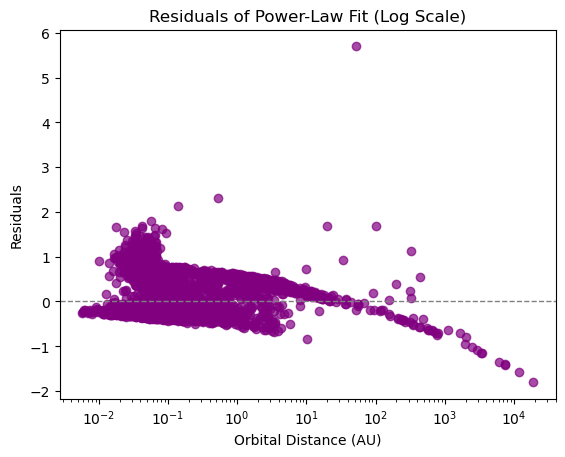

In [95]:
plt.figure()
plt.scatter(x_data, residuals, color='purple', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel('Orbital Distance (AU)')
plt.ylabel('Residuals')
plt.title('Residuals of Power-Law Fit (Log Scale)')
plt.show()